In [94]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datasist.structdata import detect_outliers as do
sns.set()

In [95]:
df = pd.read_csv('new.csv')

In [96]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,lat,long,sqft_living15,sqft_lot15,month,day,year,quarter,age
0,221900.0,3,1,1180,5650,1,0,0,3,7,...,0,47.5112,-122.257,1340,5650,10,13,2014,4,59
1,538000.0,3,2,2570,7242,2,0,0,3,7,...,400,47.7210,-122.319,1690,7639,12,9,2014,4,63
2,180000.0,2,1,770,10000,1,0,0,3,6,...,0,47.7379,-122.233,2720,8062,2,25,2015,1,82
3,604000.0,4,3,1960,5000,1,0,0,5,7,...,910,47.5208,-122.393,1360,5000,12,9,2014,4,49
4,510000.0,3,2,1680,8080,1,0,0,3,8,...,0,47.6168,-122.045,1800,7503,2,18,2015,1,28


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20317 entries, 0 to 20316
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20317 non-null  float64
 1   bedrooms       20317 non-null  int64  
 2   bathrooms      20317 non-null  int64  
 3   sqft_living    20317 non-null  int64  
 4   sqft_lot       20317 non-null  int64  
 5   floors         20317 non-null  int64  
 6   waterfront     20317 non-null  int64  
 7   view           20317 non-null  int64  
 8   condition      20317 non-null  int64  
 9   grade          20317 non-null  int64  
 10  sqft_above     20317 non-null  int64  
 11  sqft_basement  20317 non-null  int64  
 12  lat            20317 non-null  float64
 13  long           20317 non-null  float64
 14  sqft_living15  20317 non-null  int64  
 15  sqft_lot15     20317 non-null  int64  
 16  month          20317 non-null  int64  
 17  day            20317 non-null  int64  
 18  year  

## what is the avg and max price for each number of bedrooms

In [98]:
avg_price_bedrooms = df.groupby('bedrooms')['price'].agg(['max','mean'])
avg_price_bedrooms

,max,mean
bedrooms,,
1,713000.0,319900.541935
2,1100000.0,391088.408702
3,1115000.0,439417.068073
4,1118000.0,545986.712947
5,1112750.0,584332.917417
6,1112500.0,587059.791111
7,999000.0,621833.900000
8,900000.0,588444.444444
9,934000.0,670999.750000


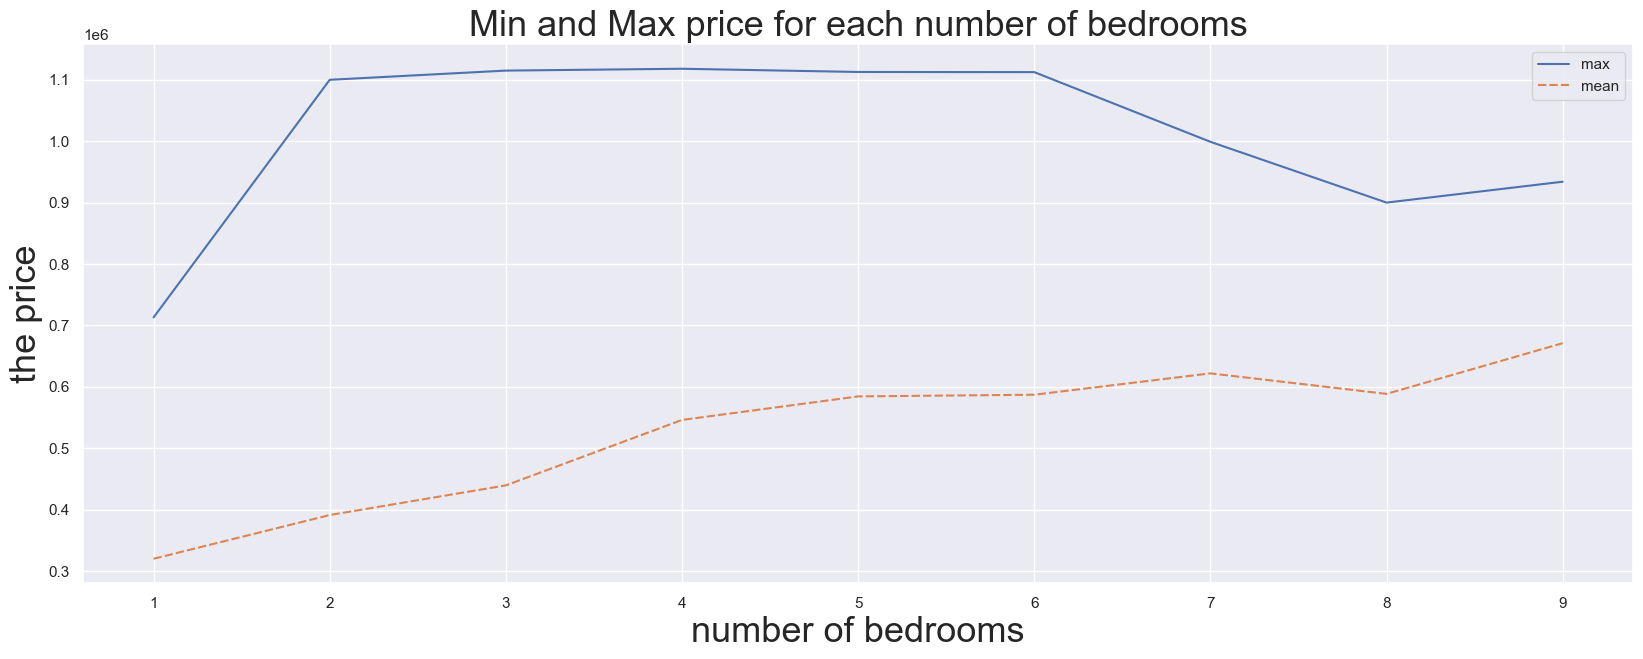

In [99]:
plt.figure(figsize=(20,7))

sns.lineplot(avg_price_bedrooms)
# Adding labels and title
plt.xlabel('number of bedrooms',fontsize=26)
plt.ylabel('the price',fontsize=26)
plt.title('Min and Max price for each number of bedrooms',fontsize=26)

# Adding a legend
plt.legend()
plt.show()

- in the max price for bedrooms the houses have from 2 untill 6 bedrooms has the highest price, but in houses have more than 6 bedrooms the price is going down 
- in the chart of mean as we the mean price is going up with number of rooms 

## what is the avg and max price for each number of bathrooms

In [100]:
avg_price_bathrooms = df.groupby('bathrooms')['price'].agg(['max','mean'])
avg_price_bathrooms

,max,mean
bathrooms,,
1,1110000.0,391729.989404
2,1118000.0,510357.486322
3,1115500.0,664204.672180
4,1112500.0,779785.641379
5,925000.0,561150.000000
6,800000.0,800000.000000
7,450000.0,450000.000000


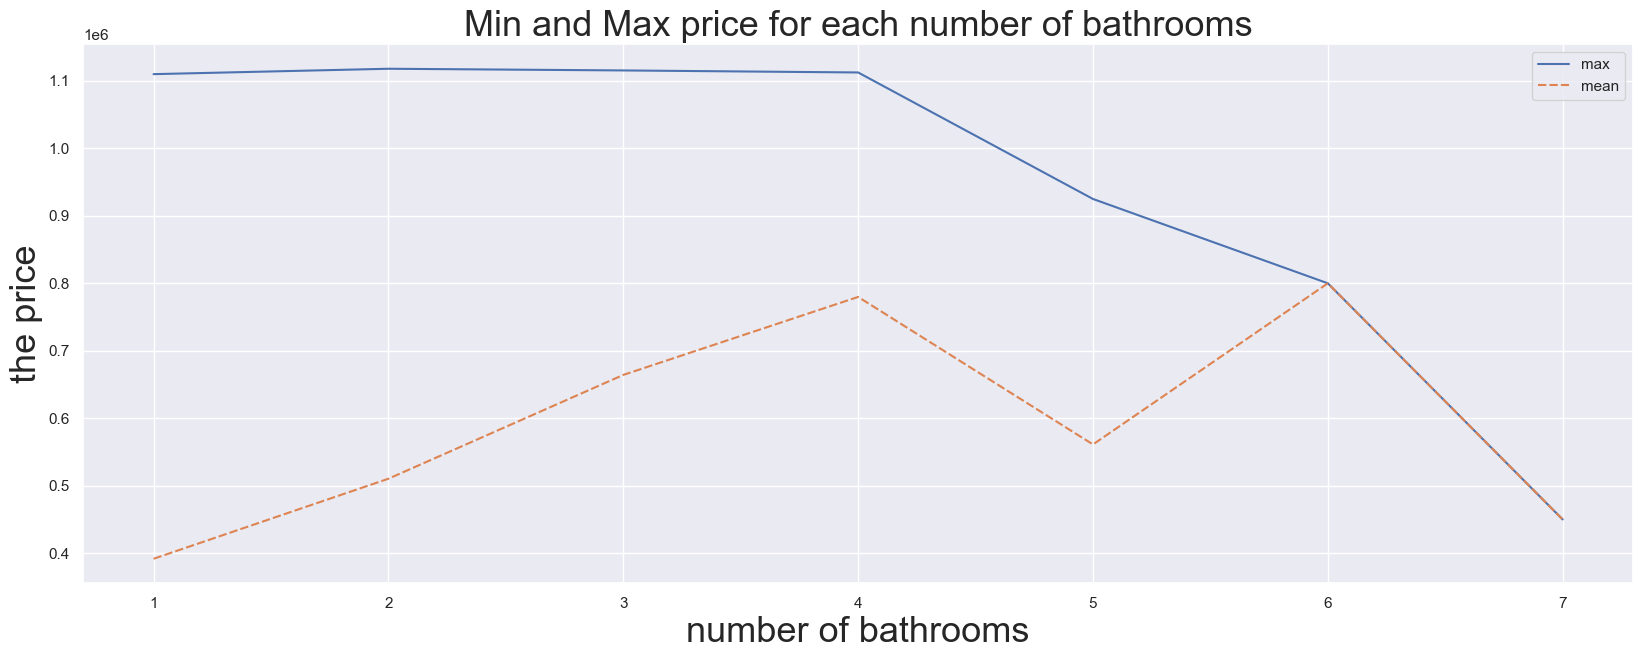

In [101]:
plt.figure(figsize=(20,7))

sns.lineplot(avg_price_bathrooms)
# Adding labels and title
plt.xlabel('number of bathrooms',fontsize=26)
plt.ylabel('the price',fontsize=26)
plt.title('Min and Max price for each number of bathrooms',fontsize=26)

# Adding a legend
plt.legend()
plt.show()

- in max price the houses that have from 1 to 4 bathrooms have the heighest price, but if the number of bathrooms bigger than 4 the price is going down 
- in mean price the houses that have 1 to 4 bathrooms too has the heighest price, after that the price is not fixed

## does the sqft_living has an effect on the price 

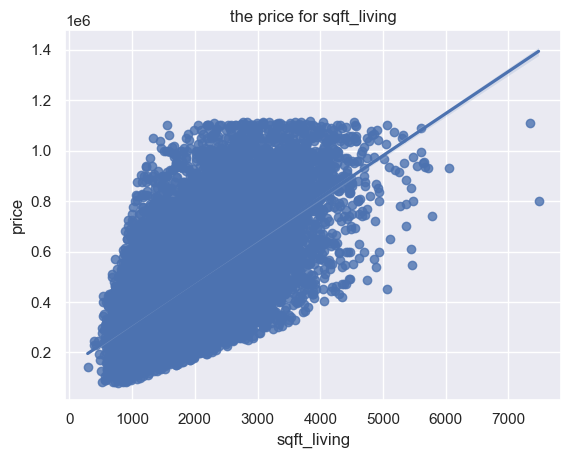

In [102]:
sns.regplot(x=df['sqft_living'],y=df['price'])
plt.title('the price for sqft_living')
plt.show()

- yes as we see the higher sqft_living the price is increasing

- Square footage of the home has a positive affect on price of house 

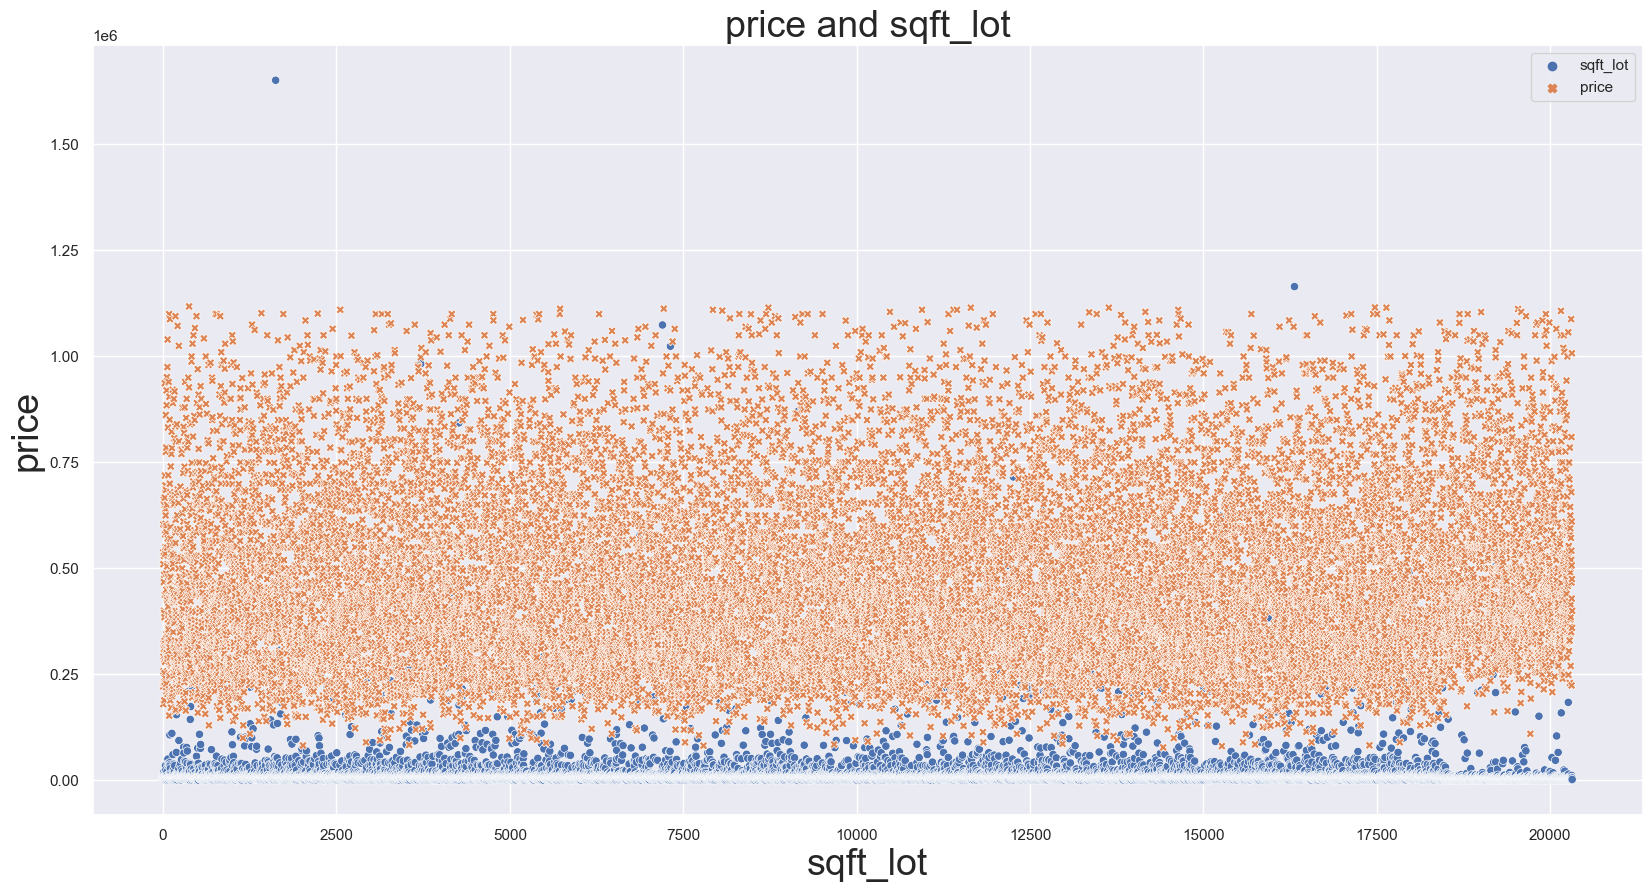

In [103]:
plt.figure(figsize=(20,10))
sns.scatterplot(df[['sqft_lot','price']],size_norm=True)
plt.title('price and sqft_lot',fontsize=27)
plt.ylabel('price',fontsize=27)
plt.xlabel('sqft_lot',fontsize=27)
plt.show()


## give me an antiuation about the price with floors

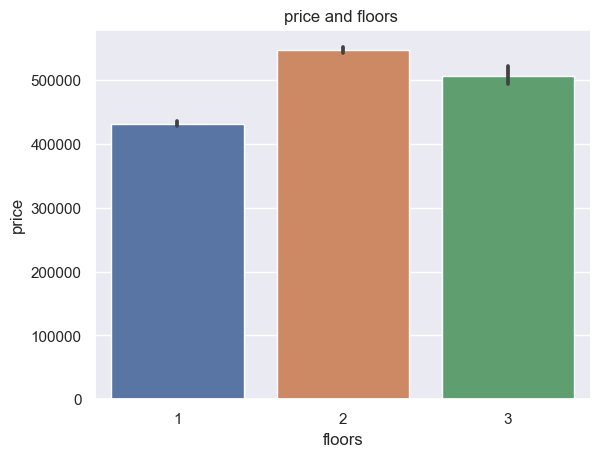

In [104]:
# px.histogram(df,y='floors',x='price',nbins=20,histfunc='max',barmode='group')
sns.barplot(df,x='floors',y='price')
plt.title('price and floors ')
plt.show()

- the highest price for house contain two floors
- lowest price for house contain one floor

In [105]:
df.groupby('floors')['floors'].count().to_frame()

,floors
floors,
1,12186
2,7560
3,571


In [106]:
## i want to make sure if chart above is missleading or not
df.groupby('floors')['price'].mean().to_frame().reset_index()

,floors,price
0,1,431777.563023
1,2,546660.717063
2,3,507185.397548


In [107]:
sns(df,x='floors',y='price',barmode='group',histfunc='avg',text_auto=True)


TypeError: 'module' object is not callable

- avg price for house has one floor and has no waterfront is  431,215k 
- avg price for house has one floor and has a waterfront is 638,6998k

- avg price for house has two  floors and has no waterfront is  546,1323k 
- avg price for house has two floors and has a waterfront is 756,3921k
    
- avg price for house has three floor and has no waterfront is  506,391k 
- avg price for house has three floor and has a waterfront is 960k
- so the houses that have waterfront have the bigest price

In [ ]:
sns.scatterplot(df,y='price', x= 'sqft_living',hue='floors',palette='deep');


- because the majority of our data that contain three floors has the lowest sqft_living because of that they have the lowest price that they have three floors 
- there is a good relation between the three variabls floors and price and sqft_living 

# which one has a good relaiton with other variable 

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.title('the relation between variables ',fontsize=26)
plt.show()

- variable has a good relationship with price [sqft_living,grade,sqft_above]
- bedrooms has a good relationship with [sqft_living]
- bathrooms has a good relationship with [sqft_living,sqft_lot,grade ,sqft_above]
- sqft_living has a good relationship with [grade,price,bedrooms,bathrooms,sqft_above]
- floors has a good relationship with [sqft_above], and has a negative relationship with [age]
- grade has a good relationship with [price,bathrooms,sqft_living,sqft_above]
- sqft_above has a good relationship with [price,bathrooms,saft_living,floors,grade]

In [ ]:
# remove values of age when <= 0
index = df[df['age']<=0].index
df.drop(index,axis=0,inplace=True)

In [ ]:
# to confirme is there other values is found 
df[df['age']<=0].index

## what is the avg and max price in each age of houses's age

In [ ]:
age = df.groupby('age')['price'].agg(['mean','max']).sort_values(by='age',ascending=False).reset_index()
age

In [ ]:
# px.line(age,x='age',y='mean')
# px.line(age,x='age',y='max')

# fig = px.line(age, x='age', y=['mean', 'max'], title='Mean and Max Prices by Age',)
# fig.show()

# Create a line chart using Plotly Express
fig = px.line(age, x='age', y=['mean', 'max'],
              labels={'age': 'Age', 'value': 'Price'},
              title='Mean and Max Prices by Age')

# Customize the chart appearance
fig.update_layout(
    legend_title_text='Statistics',
    font=dict(size=12),
    plot_bgcolor='white'
)
# fig.update_traces(line=dict(color=['blue', 'red']))

# Display the chart
fig.show()

- there is not a big change in the price for each age of house in max and mean valeus

### does the quarter in each year has a big chang in price, otherwhyes is there quarters are best salling in price

quarter_price_each_year=df.groupby(['quarter','year'])['price'].mean().to_frame().set_index('year')
quarter_price_each_year


In [82]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month',
       'day', 'year', 'quarter', 'age'],
      dtype='object')

In [83]:
df.to_csv('house_ml.csv',index=False)